https://www.datacamp.com/courses/pandas-foundations
# 1. Reading & cleaning the data
pd.read_csv( ):
- names: assigning column labels
- index_col: assigning index
- parse_dates: parsing datetimes
- na_values: parsing NaNs

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
austin81 = pd.read_csv('datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)
austin81.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


## 1) to add column headers to a DataFrame: df.columns = ['xx','xx'....]

In [144]:
austin81.columns = ['Wban', 'date', 'Time', 'StationType', 'sky_condition', 'sky_conditionFlag', 'visibility', 
                    'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren',
                    'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag', 'wet_bulb_faren', 'wet_bulb_farenFlag',
                    'wet_bulb_cel', 'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag', 'dew_point_cel',
                    'dew_point_celFlag', 'relative_humidity', 'relative_humidityFlag', 'wind_speed', 'wind_speedFlag', 
                    'wind_direction','wind_directionFlag', 'value_for_wind_character','value_for_wind_characterFlag', 
                    'station_pressure', 'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag', 
                    'presschange', 'presschangeFlag', 'sea_level_pressure','sea_level_pressureFlag', 'record_type', 
                    'hourly_precip', 'hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk']

In [145]:
austin81.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [146]:
austin81.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 44 columns):
Wban                            10337 non-null int64
date                            10337 non-null int64
Time                            10337 non-null int64
StationType                     10337 non-null int64
sky_condition                   10337 non-null object
sky_conditionFlag               10337 non-null object
visibility                      10325 non-null object
visibilityFlag                  10337 non-null object
wx_and_obst_to_vision           10337 non-null object
wx_and_obst_to_visionFlag       10337 non-null object
dry_bulb_faren                  10337 non-null object
dry_bulb_farenFlag              10337 non-null object
dry_bulb_cel                    10337 non-null object
dry_bulb_celFlag                10337 non-null object
wet_bulb_faren                  10337 non-null object
wet_bulb_farenFlag              10337 non-null object
wet_bulb_cel                   

## 2) Convert the date column to string: df.column = df.column.astype(str)

In [147]:
austin81.date = austin81.date.astype(str)
type(austin81.date)

pandas.core.series.Series

## 3) Add leading 0s to the Time column

In [148]:
austin81.Time = austin81.Time.apply(lambda x:'{:0>4}'.format(x))
austin81.Time.head()

0    0053
1    0153
2    0253
3    0353
4    0453
Name: Time, dtype: object

## 4) Concatenate the date & Time columns

In [149]:
datestring = austin81.date + austin81.Time
datestring.head()

0    201101010053
1    201101010153
2    201101010253
3    201101010353
4    201101010453
dtype: object

## 5) Convert the datestring Series to datetime: format='%Y%m%d%H%M'. Y must be capitalized. m&d must be in lower case.

In [150]:
datetime = pd.to_datetime(datestring, format='%Y%m%d%H%M')
datetime.head()

0   2011-01-01 00:53:00
1   2011-01-01 01:53:00
2   2011-01-01 02:53:00
3   2011-01-01 03:53:00
4   2011-01-01 04:53:00
dtype: datetime64[ns]

## 6) Set the index to be the new datetime container

In [151]:
austin = austin81.set_index(datetime)
austin.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [152]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 44 columns):
Wban                            10337 non-null int64
date                            10337 non-null object
Time                            10337 non-null object
StationType                     10337 non-null int64
sky_condition                   10337 non-null object
sky_conditionFlag               10337 non-null object
visibility                      10325 non-null object
visibilityFlag                  10337 non-null object
wx_and_obst_to_vision           10337 non-null object
wx_and_obst_to_visionFlag       10337 non-null object
dry_bulb_faren                  10337 non-null object
dry_bulb_farenFlag              10337 non-null object
dry_bulb_cel                    10337 non-null object
dry_bulb_celFlag                10337 non-null object
wet_bulb_faren                  10337 non-null object
wet_bulb_farenFlag              10337 non-null o

## 7) Convert strings to numeric values: objects converted to float 64.
## pd.to_numeric(Series, errors='coerce')
- If ‘coerce’, then invalid parsing will be set as NaN

In [153]:
austin.dry_bulb_faren.loc['June 20, 2011 8am':'June 20, 2011 9am']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
2011-06-20 09:08:00    84
2011-06-20 09:53:00    88
Name: dry_bulb_faren, dtype: object

In [154]:
austin.dry_bulb_faren = pd.to_numeric(austin.dry_bulb_faren, errors='coerce')

In [155]:
austin.dry_bulb_faren.loc['June 20, 2011 8am':'June 20, 2011 9am']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
2011-06-20 09:08:00    84.0
2011-06-20 09:53:00    88.0
Name: dry_bulb_faren, dtype: float64

## 8) Convert more columns to numeric values

In [156]:
austin.wind_speed = pd.to_numeric(austin.wind_speed, errors='coerce')
austin.dew_point_faren = pd.to_numeric(austin.dew_point_faren, errors='coerce')
austin.visibility = pd.to_numeric(austin.visibility, errors='coerce')

In [157]:
austin.wind_speed.head()

2011-01-01 00:53:00    15.0
2011-01-01 01:53:00    10.0
2011-01-01 02:53:00    15.0
2011-01-01 03:53:00     7.0
2011-01-01 04:53:00    11.0
Name: wind_speed, dtype: float64

In [158]:
austin.dew_point_faren.head()

2011-01-01 00:53:00    15.0
2011-01-01 01:53:00    14.0
2011-01-01 02:53:00    13.0
2011-01-01 03:53:00    17.0
2011-01-01 04:53:00    15.0
Name: dew_point_faren, dtype: float64

In [159]:
austin.visibility.head()

2011-01-01 00:53:00    10.0
2011-01-01 01:53:00    10.0
2011-01-01 02:53:00    10.0
2011-01-01 03:53:00    10.0
2011-01-01 04:53:00    10.0
Name: visibility, dtype: float64

# 2. Statistical Exploratory Data Analysis

In [160]:
austin.dry_bulb_faren.median()

72.0

In [161]:
austin.loc['April, 2011': 'June 2011', 'dry_bulb_faren'].median()

78.0

In [162]:
austin.dry_bulb_faren.loc['2011-Jan'].median()

48.0

In [163]:
daily_mean = austin.resample('D').mean()
daily_mean.head()

,Wban,StationType,visibility,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,10.000000,50.166667,20.500000,11.083333
2011-01-02,13904,12,10.000000,39.416667,19.708333,4.166667
2011-01-03,13904,12,10.000000,46.846154,35.500000,2.653846
2011-01-04,13904,12,5.071429,53.367347,50.408163,2.510204
2011-01-05,13904,12,7.672414,57.965517,40.068966,4.689655


### Extract the dry_bulb_faren column and return array

In [164]:
daily_temp = daily_mean.dry_bulb_faren.values
daily_temp

array([50.16666667, 39.41666667, 46.84615385, 53.36734694, 57.96551724,
       46.95833333, 51.91666667, 51.81481481, 43.61363636, 38.27777778,
       34.74074074, 34.04166667, 35.875     , 43.29032258, 46.90625   ,
       49.39473684, 51.79310345, 52.97619048, 50.60714286, 47.44117647,
       35.25      , 43.        , 44.1       , 47.625     , 47.83333333,
       42.375     , 49.64      , 53.66666667, 60.65517241, 67.25806452,
       62.1875    , 38.40625   , 22.125     , 24.03571429, 26.15384615,
       42.33333333, 53.64      , 44.8       , 46.28      , 34.08571429,
       29.08333333, 35.08333333, 41.29166667, 52.25      , 53.89473684,
       65.52631579, 66.24242424, 68.5625    , 68.6969697 , 65.25714286,
       69.82758621, 68.81481481, 57.23076923, 66.        , 70.09677419,
       54.75      , 62.82857143, 72.23333333, 63.2       , 53.375     ,
       56.04166667, 57.67857143, 65.19354839, 55.96      , 50.16666667,
       58.03125   , 71.90625   , 58.92307692, 53.125     , 56.91

In [165]:
df_climate = pd.read_csv('datasets/weather_data_austin_2010.csv', parse_dates=True, index_col='Date')
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [166]:
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


### Extract the Temperature column from the DataFrame

In [167]:
a = daily_climate.reset_index().Temperature
a.head()

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
Name: Temperature, dtype: float64

In [168]:
diff = daily_temp - a
diff.head()

0     0.829167
1   -10.379167
2    -3.053846
3     3.638180
4     8.123851
Name: Temperature, dtype: float64

In [169]:
diff.mean()

1.3301831870056482

### Filtering the dataset
Filtering Method 1: df.loc[df.column == 'xx']

In [170]:
sky = austin.sky_condition == 'CLR'
sky.head()

2011-01-01 00:53:00    False
2011-01-01 01:53:00    False
2011-01-01 02:53:00    False
2011-01-01 03:53:00    False
2011-01-01 04:53:00    False
Name: sky_condition, dtype: bool

In [171]:
sunny = austin.loc[sky]
sunny.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,,10.0,,,,...,,,30.16,,AA,,,,30.17,
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,,10.0,,,,...,012,,30.16,,AA,,,,30.17,
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,,10.0,,,,...,,,30.17,,AA,,,,30.17,
2011-01-01 16:53:00,13904,20110101,1653,12,CLR,,10.0,,,,...,,,30.18,,AA,,,,30.18,
2011-01-01 17:53:00,13904,20110101,1753,12,CLR,,10.0,,,,...,013,,30.21,,AA,,,,30.20,


Filtering Method 2: df[df.column == 'xx']

In [172]:
austin[austin.sky_condition == 'CLR'].head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,,10.0,,,,...,,,30.16,,AA,,,,30.17,
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,,10.0,,,,...,012,,30.16,,AA,,,,30.17,
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,,10.0,,,,...,,,30.17,,AA,,,,30.17,
2011-01-01 16:53:00,13904,20110101,1653,12,CLR,,10.0,,,,...,,,30.18,,AA,,,,30.18,
2011-01-01 17:53:00,13904,20110101,1753,12,CLR,,10.0,,,,...,013,,30.21,,AA,,,,30.20,


In [173]:
# resample sunny by day, then calculate the max
sunny_daily = sunny.resample('D').max()
sunny_daily

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
2011-01-01,13904.0,20110101,2353,12.0,CLR,,10.0,,,,...,024,,30.33,,AA,,,,30.32,
2011-01-02,13904.0,20110102,2253,12.0,CLR,,10.0,,,,...,008,,30.38,,AA,,,,30.36,
2011-01-03,13904.0,20110103,0453,12.0,CLR,,10.0,,,,...,008,,30.27,,AA,,,,30.25,
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,,10.0,,,,...,014,,30.08,,AA,,,,30.07,
2011-01-06,13904.0,20110106,0553,12.0,CLR,,10.0,,,,...,004,,30.10,,AA,,,,30.10,
2011-01-07,13904.0,20110107,2353,12.0,CLR,,10.0,,,,...,015,,29.89,,AA,,,,29.89,
2011-01-08,13904.0,20110108,0553,12.0,CLR,,10.0,,,,...,006,,29.92,,AA,,,,29.92,
2011-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Visual Exploratory Data Analysis: df.corr( )

In [185]:
austin.visibility = pd.to_numeric(austin.visibility) 

In [186]:
weekly_mean = austin[['visibility', 'dry_bulb_faren']].resample('W').mean()
weekly_mean.head()

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.791667
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188


In [187]:
type(weekly_mean)

pandas.core.frame.DataFrame

In [188]:
weekly_mean.corr()

,visibility,dry_bulb_faren
visibility,1.000000,0.490328
dry_bulb_faren,0.490328,1.000000


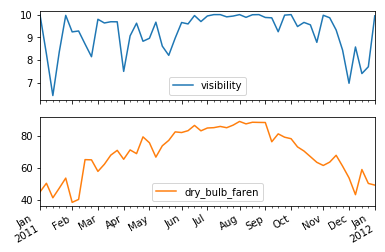

In [190]:
weekly_mean.plot(subplots=True)
plt.show()

In [193]:
austin[austin.sky_condition=='CLR'].resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [194]:
clear_sky = austin.sky_condition == 'CLR'
b = clear_sky.resample('D')
b

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [195]:
monthly_max = austin[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()
monthly_max

,dew_point_faren,dry_bulb_faren
2011-01-31,63.0,80.0
2011-02-28,70.0,85.0
2011-03-31,68.0,87.0
2011-04-30,73.0,93.0
2011-05-31,76.0,100.0
2011-06-30,75.0,104.0
2011-07-31,76.0,102.0
2011-08-31,76.0,110.0
2011-09-30,75.0,102.0
2011-10-31,72.0,93.0


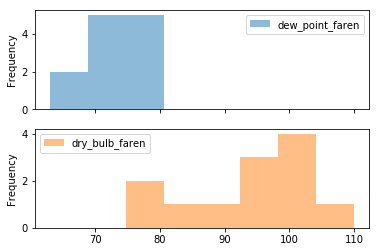

In [200]:
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)
plt.show()

### Probability of high temperatures

In [201]:
aug_max = df_climate.loc['Aug 2010', 'Temperature'].max()
aug_max

95.3

In [204]:
aug = austin.loc['Aug 2011', 'dry_bulb_faren'].resample('D').max()
aug.head()

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Freq: D, Name: dry_bulb_faren, dtype: float64

In [206]:
aug_high = aug.loc[aug > aug_max]
aug_high.head()

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Name: dry_bulb_faren, dtype: float64

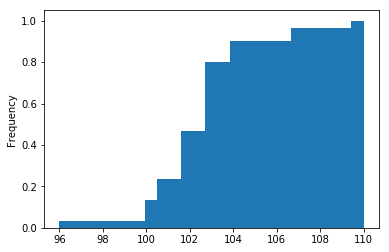

In [212]:
aug_high.plot(kind='hist', bins=25, normed=True, cumulative=True)
plt.show()